Hi everybody,  
In this kernel, I will try to do some exploratory data analysis and I will also try to find answers for some questions to uncover insights.
First of all, I would like to share you the Entity Relationship Diagram(ERD) of this dataset which will help us to determine what kind of joins, merges should be applied and 
which primary and foreign keys must be used.
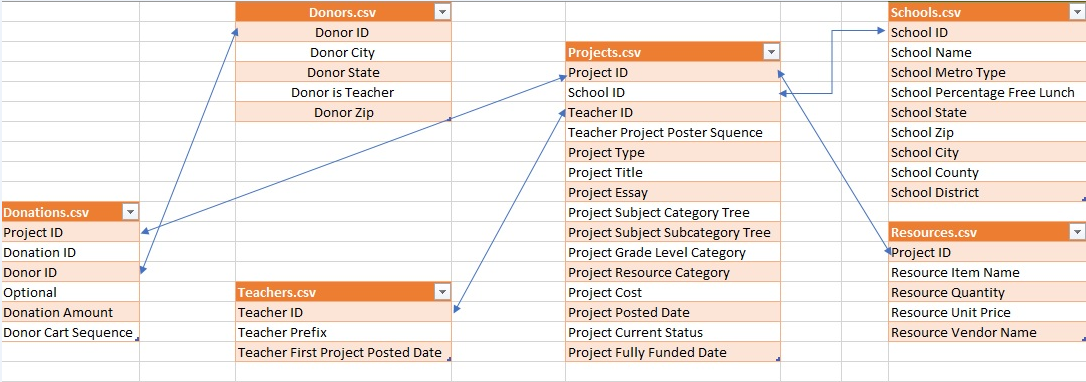
For example : if we want to combine donors with the projects we must first combine projects with donations and then combine donors in order to do perfect merging since there is no mutual column in between donors and projects directly. 


Note: If you cant see the image above, please click this link :
(https://ibb.co/nv7Otn)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [ ]:
## This will gather necessary libraries for plotting.
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
from matplotlib import style 
import datetime as dt
style.use("ggplot")


In [ ]:
# It is time to grab the data one by one.
resources = pd.read_csv("../input/Resources.csv", error_bad_lines = False, warn_bad_lines = False, low_memory = False)

In [ ]:
schools = pd.read_csv("../input/Schools.csv", error_bad_lines = False, warn_bad_lines = False)

In [ ]:
donors = pd.read_csv("../input/Donors.csv",low_memory = False)

In [ ]:
donations = pd.read_csv("../input/Donations.csv", error_bad_lines = False, warn_bad_lines = False)

In [ ]:
teachers = pd.read_csv("../input/Teachers.csv", error_bad_lines = False, warn_bad_lines = False)

In [ ]:
projects = pd.read_csv("../input/Projects.csv", error_bad_lines = False, warn_bad_lines = False)

In [ ]:
## lets look at their shapes respectively.
print(" Shape of the resources dataframe is: " , resources.shape)
print(" Shape of the schools dataframe is: ", schools.shape)
print(" Shape of the donors dataframe is: ", donors.shape)
print(" Shape of the donations dataframe is: ", donations.shape)
print(" Shape of the teachers dataframe is: ", teachers.shape)
print(" Shape of the projects dataframe is: ", projects.shape)

In [ ]:
# Lets look at he first 5 rows for each dataframe to explore column names, indexes better. 
resources.head()

In [ ]:
schools.head()

In [ ]:
donors.head()

In [ ]:
donations.head()

In [ ]:
teachers.head()

In [ ]:
projects.head()

**I will write down some codes for ones who want to better explore the data :**

**1) To get the column names of our dataframes :**

* schools.columns ,
* projects.columns,
* resources.columns ,
* donors.columns ,
* donations.columns ,
* teachers.columns

**2) To get the data type of each column of a dataframe: **

* donations.dtypes,
* schools.dtypes,
* projects.dtypes,
* resources.dtypes,
* donors.dtypes,
* teachers.dtypes,

**3) To get the number of Nan's in each column of a dataframe :** 

* donations.isnull().sum(),
* schools.isnull().sum(),
* projects.isnull().sum(),
* resources.isnull().sum(),
* donors.isnull().sum(),
* teachers.isnull().sum()

**4) To understands the statistics of columns that have numeric data types.**

* donations.describe(),
* schools.describe(),
* projects.describe(),
* resources.describe(),
* donors.describe(),
* teachers.describe()

**5) To understand how many unique values that a column have :**

* schools["Name"].nunique(), 
* donors["City"].nunique(), 
* teachers["Teacher Prefix"].nunique()

**6) Last but not least **: if you want to change the data type of a column, lets assume that "School Percentage Free Lunch" column of schools dataframe given as string but it must be float type as expected ( actually it is ).

schools["School Percentage Free Lunch"] = schools["School Percentage Free Lunch"].astype(float)



In [ ]:
# I would like to combine all dataframes in a one big dataframe to start my analysis. Normally you can perform analysis in each dataframe individually
# but this time I will try to do it in one big dataframe. I will look through ERD that I shared at the top.
data = pd.merge(projects, donations, how = "inner", on = "Project ID")


In [ ]:
data.shape

In [ ]:
data2 = pd.merge(data, donors, how = "inner", on = "Donor ID")

In [ ]:
data2.shape

In [ ]:
data3 = pd.merge(data2, schools, how = "inner", on = "School ID")

In [ ]:
data3.shape

In [ ]:
data4 = pd.merge(data3, teachers, how = "inner", on = "Teacher ID")

In [ ]:
data4.shape

In [ ]:
# It appears that when I want to combine remaining recources dataframe with the 
# data4 (which includes projects, donors, donations, teachers and schools) kernel dies since it creates seven times greater dataframe. So I decide to 
# not add resources for now.I will merge projects and resources later on. It looks like we obtained a nice 4.4 million rows and 34 columns dataframe. 
# I am already excited. Lets dive and see what we can dig from this dataframe.

In [ ]:
data4.head(5)

In [ ]:
a = data4.columns.values.tolist()  ##to get all column names in our dataframe as a list.
a

In [ ]:
# Lets start with simpler questions: Which 10 states have the most number of schools that opened projects to gather donations ? 
# to answer this question we dont need our combined dataframe. WE should answer this question by looking only schools dataframe 
# since in our combined  dataframe we duplicated project ID's for each donation which also caused states to duplicate too.
s = schools["School State"].value_counts().sort_values(ascending = False).head(10)
s

In [ ]:
# lets visualize this with a bar plot Since it has different categories ( states )
s.plot.bar()
plt.xlabel("states")
plt.ylabel("number of schools")
plt.title("Number of Schools involved in Projects by State")
plt.tight_layout()
plt.margins(0.05)



In [ ]:
# Lets ask a more advanced version of this question :What are the top 10 states in which 
# schools gathered most amount of AVERAGE donations for their projects ? 
# This time we need our combined dataframe !
s2 = data4.groupby("School State")["Donation Amount"].mean().sort_values(ascending = False).head(10)
s2

In [ ]:
# Lets visualize states that have more average donations per project than others.
s2.plot.barh()
plt.xlabel("Average Donations Per Project ( in dollars )")
plt.ylabel("States")
plt.axvline(data4.groupby("School State")["Donation Amount"].mean().mean(), color = "blue", linewidth = 2 )
plt.title("Top 10 States that gather donations more than average")
plt.tight_layout()
plt.margins(0.05)


In [ ]:
# I want to further investigate the maximum, minimum, mean, median, 25th and 75th percentiles of "Donation Amount" column. What is the average donation
# amount acroos all projects ? What are the minimum and maximums ? 
mean = np.mean(data4["Donation Amount"].dropna())
median = np.median(data4["Donation Amount"].dropna())
percentiles = np.percentile(data4["Donation Amount"].dropna(), [25,75])
minimum = data4["Donation Amount"].dropna().min()
maximum = data4["Donation Amount"].dropna().max()
print("Mean donation amount is: ", np.round(mean,2))
print("Median donation amount is ", median)
print("25th and 75th percentiles are: ", percentiles)
print("Minimum and maximum donation amounts are :", minimum, "    ",maximum)


**We can immediately observe from above statistics that our Donations Amount column have lots of outliers since mean is 60 whereas median is 25 which shows that there are plenty of outliers causing mean to rise,  second indicator is that we have 25th and 75th percentiles both below than mean. In other words although %75 percent of our data smaller than 50 we have a mean values which is 60.66 which is also a good indicator of outliers. Lastly we can easily say that maximum value is a huge outlier too.**


In [ ]:
# I want to plot Empirical Cumulative Distribution Function(ECDF) of "Donation Amount" column.It will better visualize the existence of outliers 
# in the data.This method is pretty nifty for EDA. I recommend you to adapt this as a convention.
# Basically it shows in which percent my data has points greater or smaller than the value shown in the x axis.
# Although it is not clear here we can immediately see that almost 99 percent of our data lies in the range of 0 to 100.
x = np.sort(data4["Donation Amount"].dropna())
y = np.arange(1, len(x)+1) / len(x)
plt.plot(x,y,marker = ".", linestyle = "none")


In [ ]:
# Now, I want to know in which states there are more donations done by donors. 
s3 = data4.groupby("Donor State")["Donation ID"].count().sort_values(ascending = False).head(15)
s3

**Now, it is time for a more advanced question ? Is there a relationship between the number of projects offered and number of donations made by the
donors. Which states performing better in this case ? How many of them responding project requests below average and which states are performing best
in terms of donations per project ?  In order to answer this question we must first get the number of projects per state and then number of donations made per state. Then we should merge this two and plot a scatter plot to visualize it . Lets do it ! **



In [ ]:
s4 = schools["School State"].value_counts()
s5 = data4.groupby("Donor State")["Donation ID"].count()
df = pd.concat([s4,s5], axis = 1, keys = ["Projects", "Donations"])
df.head(10)


In [ ]:
df.loc[:,df.isnull().any()]   ## returns column with any Nan values 

In [ ]:
df = df.dropna()

In [ ]:
# Now it is time to visualize this data for further insights.
df.plot.scatter(x = "Projects", y = "Donations")
plt.title("Projects vs Donations")
plt.tight_layout()
plt.margins(0.05)


**It can be seen from the graph above that there is a positive correlation between projects requested and donations made. It looks like we can model it with a linear equation.
Before that I would like to know what is the correlation coefficient between these two. Is it strong or moderately correlated ?  Lets check it **


In [ ]:
np.corrcoef(df.Projects,df.Donations)   ## It is indeed a pretty strong correlation which is equal to 0.944

In [ ]:
## In this part, I will try to explain how we can add data labels in scatter plot with the help of .annotate() method.
df.plot.scatter(x = "Projects", y = "Donations")
plt.title("Projects vs Donations")
for i, j in enumerate(df.index):
    plt.annotate(j,(df.Projects[i], df.Donations[i]))
plt.tight_layout()
plt.margins(0.05)
## to increase figure size : 
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)


In [ ]:
# Now, I would like to fit a linear model which will basically indicate the relationship between projects and donations.
slope, intercept = np.polyfit(df.Projects, df.Donations, 1)
x = np.array([df.Projects.min(), df.Projects.max()])
y =  slope * x + intercept 
plt.plot(x,y)

In [ ]:
## Now, lets combine two graphs in the same plot: 
_ = df.plot.scatter(x = "Projects", y = "Donations")
_ = plt.title("Projects vs Donations")
slope, intercept = np.polyfit(df.Projects, df.Donations, 1)
x = np.array([df.Projects.min(), df.Projects.max()])
y =  slope * x + intercept 
_ = plt.plot(x,y)
_ = plt.tight_layout()
_ = plt.margins(0.05)

**Basically, the points below this line are relatively worse performing states in terms of number of donations made. Of course it is not just number, the amount of the donations are also a big consideration but the graph above just compares it with the number of donations. If we want to analyze total donation amount made versus states then we should follow the same path but this time we must sum donations for each state. I will not do it here but I recommend you to try this one .**



In [ ]:
# Lets recall our dataframe to seek for new questions :
data4.head(1)

In [ ]:
## How mant different project types exists ?  What is the total donation amount for each of them ? 
s6 = data4["Project Type"].value_counts()
s6

In [ ]:
s7 = data4.groupby("Project Type")["Donation Amount"].sum().astype(int)
s7

In [ ]:
plt.subplot(1,2,1)
plt.pie(s6, autopct = '%1.1f%%',labels = s6.index, startangle = 90)
plt.tight_layout()
plt.margins(0.05)
plt.legend(loc = "upper left")
plt.subplot(1,2,2)
plt.pie(s7, autopct = "%1.1f%%",labels = s7.index, startangle = 90)
plt.legend(loc = "upper left")
plt.tight_layout()
plt.margins(0.05)
fig = plt.gcf()
fig.set_size_inches(15, 5)

In [ ]:
## How mant project subject category trees exists ? Which ones attracted the most donations ? 
data4["Project Subject Category Tree"].nunique()



In [ ]:
# Which ones attracted the most donations ? 
s8 = data4.groupby("Project Subject Category Tree")["Donation Amount"].sum().sort_values(ascending = False).astype(int).head(15)
s8

In [ ]:
## To convert it to million dollars.
s9 = s8 / 1000000
# lets visualize it : 
s9.plot.bar()
plt.xlabel("Project Subject Category")
plt.ylabel("Donation Amount ( million dollars )")
plt.title("Donation Amount by Project Subject")


## Okay, Lets ask one last question for now :
# What is the mean time that takes a project to be fully funded after posted and how it varies between states ? 
# Which states are the best and which are the worst performing in terms of this criteria ( mean project fully funded time) ??


In [ ]:
data4[["Project Posted Date", "Project Fully Funded Date"]].isnull().sum()
## to see how many projects are still open, we may choose to remove that ones.


In [ ]:
# to understand their formats. These two columns are initially object types. We will convert them to datetime.
data4[["Project Fully Funded Date", "Project Posted Date"]].head(10)

In [ ]:
data4["Project Posted Date"] = pd.to_datetime(data4["Project Posted Date"])
data4["Project Posted Date"].dtype

In [ ]:
data4["Project Fully Funded Date"] = pd.to_datetime(data4["Project Fully Funded Date"].dropna())
data4["Project Fully Funded Date"].dtype

In [ ]:
data4["Funding Time"] = data4["Project Fully Funded Date"] - data4["Project Posted Date"]
data4[["Funding Time","Project Fully Funded Date","Project Posted Date"]].head()


In [ ]:
data4[["Funding Time","Project Fully Funded Date","Project Posted Date"]].isnull().sum()

In [ ]:
data5 = data4[pd.notnull(data4["Funding Time"])]   ## to drop NaT values.
data5[["Funding Time","Project Fully Funded Date","Project Posted Date"]].isnull().sum()

In [ ]:
import datetime as dt
data5["Funding Time"] = data5["Funding Time"].dt.days 

In [ ]:
data5[["Funding Time","Project Fully Funded Date","Project Posted Date"]].head()

In [ ]:
mean_time_project_funding = data5.groupby("Project ID")["Funding Time"].mean()
overall_mean_time = mean_time_project_funding.mean()
overall_mean_time

**Notice the fact that mean_time_project_funding is a series which consists of different mean funding times for different projects.
However, overall_mean_time is a value which gives us the mean funding time of all projects. If we calculated overall_mean_time by simply using 
"Funding Time" column we would get the wrong answer since it basically duplicates funding time column for each donation. Lets assert that :**


In [ ]:
wrong_overall_mean_time = data5["Funding Time"].mean()
wrong_overall_mean_time

**So we calculated that overall mean project fully funding time is approximately 32 days. Lets dive deep to find whether this change significantly by different states.**

In [ ]:
states_project_funding_time = data5.groupby(["School State", "Project ID"])["Funding Time"].mean()
states_project_funding_time

In [ ]:
states_average_funding_time = states_project_funding_time.groupby("School State").mean()
states_average_funding_time.round(0)   ## to get the exact days I rounded to 0 decimal.

**In the operations above, we calculated that average project fully funding time is 32 days. Later we founded average project funding time for each states.
Lets see which are them performing best ( in which 10 states project funded earlier than average days ? )
Lets also see which are them performing worst ( in which 10 states project funded later than average days ? ) **


In [ ]:
ss = states_average_funding_time.round(0)
ss[ss < 32].sort_values().head(10)

In [ ]:
fast_funding_states = ss[ss < 32].sort_values().head(10)
fast_funding_states.plot.bar()
plt.axhline(32, color ="m", linewidth = 2)
plt.ylim(0,40)
plt.xlabel("States")
plt.ylabel("Fully Funding Time  ( in days )")
plt.title("States that fund projects faster than others")



In [ ]:
ss[ss > 32].sort_values(ascending = False).head(10)


In [ ]:
slow_funding_states = ss[ss > 32].sort_values(ascending = False).head(10)
slow_funding_states.plot.bar()
plt.axhline(32, color = "m", linewidth = 2)
plt.ylim(0,40)
plt.xlabel("States")
plt.ylabel("Fully Funding Time  ( in days )")
plt.title("States that fund projects slower than others")


**This is the end of my analysis. Thank you for viewing it and I will be aprreciated for any kind of support to improve myself.**